In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

from sabreMod import sosf,sosfn
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="12"


ISIS blue arm

In [2]:
Red=dict()
Red[0]='Obs\ISIS.595.Blue.txt'
DataR=pd.read_table(Red[0])
DataR=DataR.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0","Line":"Line.0","ErrL":"ErrL.0"})
DataR

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1.0,214.5600,22.0,1.0,595a1_880-001004.xlsx,4853.837,0.185,0.644,0.374,10.260,...,50.299,176.260,76.337,-2.921,0.7299,-548.000,-348.100,NaN,NaN,NaN
1,2.0,213.1296,22.0,1.0,595a1_880-005008.xlsx,4855.518,0.298,0.287,0.873,-9.238,...,4.219,34.160,8.581,-2.898,0.7155,-105.400,-28.260,NaN,NaN,NaN
2,3.0,211.6992,22.0,1.0,595a1_880-009012.xlsx,4850.115,0.978,-1.573,1.036,3.090,...,1.416,7.574,2.570,-4.309,1.5730,-34.740,-12.440,NaN,NaN,NaN
3,4.0,210.2688,22.0,1.0,595a1_880-013016.xlsx,4514.190,5.551,-282.157,23.988,75.120,...,0.423,1.494,0.762,-5.956,3.1770,-9.471,-5.178,NaN,NaN,NaN
4,5.0,208.8384,22.0,1.0,595a1_880-017020.xlsx,4855.943,0.000,-0.242,0.121,-53.670,...,0.000,0.103,0.000,46700.000,0.0000,5126.000,4659.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
i=1#[OIII]4959
Dt1=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC."+str(i)],DataR["Width."+str(i)],DataR["ErrW."+str(i)],DataR["Peak."+str(i)],DataR["ErrP."+str(i)],DataR["Line."+str(i)],DataR["ErrL."+str(i)]]
Dt1=pd.DataFrame(Dt1).T
Dt1.describe()

,X,Y,Center.1,ErrC.1,Width.1,ErrW.1,Peak.1,ErrP.1,Line.1,ErrL.1
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000,1.350000e+03,1.350000e+03
mean,107.995200,10.555556,4926.967301,7.419213,26.308670,12.755878,1.555556e+15,37.010851,-1.408149e+13,-1.168889e+12
std,61.959713,6.996416,453.693180,37.712505,176.477789,69.946667,5.715476e+16,770.486097,5.173867e+14,4.294772e+13
min,1.430400,0.000000,0.000000,0.000000,-657.324000,0.000000,-3.564000e+08,0.000000,-1.901000e+16,-1.578000e+15
25%,54.355200,5.000000,4953.494250,0.084250,0.370750,0.168500,-2.146000e+00,0.587125,-4.604250e+00,-2.651750e+00
50%,107.995200,11.000000,4954.607000,0.299000,1.151500,0.491000,-5.327500e-01,1.112500,-1.055000e+00,0.000000e+00
75%,161.635200,15.000000,4956.350000,0.993000,2.762000,1.427750,4.079000e+00,1.697250,4.081000e+00,1.787750e+00
max,214.560000,22.000000,6454.331000,479.118000,1991.088000,920.149000,2.100000e+18,26810.000000,2.656000e+07,4.994000e+06


In [4]:
i=2#[OIII]5007
Dt2=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC."+str(i)],DataR["Width."+str(i)],DataR["ErrW."+str(i)],DataR["Peak."+str(i)],DataR["ErrP."+str(i)],DataR["Line."+str(i)],DataR["ErrL."+str(i)]]
Dt2=pd.DataFrame(Dt2).T
Dt2.describe()

,X,Y,Center.2,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000,1.349000e+03,1.350000e+03
mean,107.995200,10.555556,4975.200949,7.419213,26.284313,12.755878,4.666667e+15,111.033154,-4.227578e+13,-3.507409e+12
std,61.959713,6.996416,458.000088,37.712505,176.483756,69.946667,1.714643e+17,2311.480564,1.552735e+15,1.288704e+14
min,1.430400,0.000000,0.000000,0.000000,-657.324000,0.000000,-1.069000e+09,0.000000,-5.703000e+16,-4.735000e+15
25%,54.355200,5.000000,5002.124250,0.084250,0.370750,0.168500,-6.437750e+00,1.761500,-1.383000e+01,-7.956000e+00
50%,107.995200,11.000000,5003.237000,0.299000,1.151500,0.491000,-1.598500e+00,3.338000,-3.242000e+00,0.000000e+00
75%,161.635200,15.000000,5004.980000,0.993000,2.762000,1.427750,1.223500e+01,5.090750,1.224000e+01,5.363000e+00
max,214.560000,22.000000,6502.960000,479.118000,1991.088000,920.149000,6.300000e+18,80430.000000,7.969000e+07,1.498000e+07


[OIII]4959

Peak

In [5]:
#data_P=(Dt1.round(2)).pivot(index='Y', columns='X', values='Peak.1')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#sns.heatmap(data_P, cmap="inferno")
#plt.gca().invert_yaxis()
#plt.axis('equal')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-9.226080000000001, 225.21648, -1.1, 23.1)

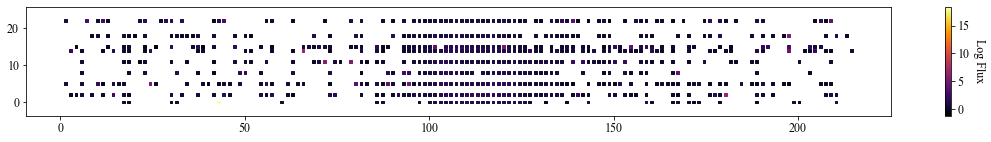

In [6]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))

plt.scatter(Dt1.X,Dt1.Y,c=np.log10(Dt1['Peak.1']), s=8,marker='s',cmap="inferno")
cbar = plt.colorbar()
cbar.set_label('Log Flux', rotation=270, labelpad=15)  
plt.axis('equal')

(0.0, 18.0, 0.0, 9.0)

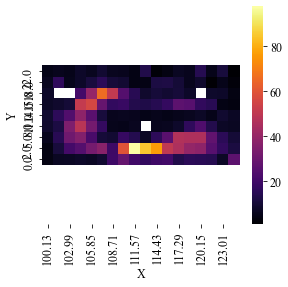

In [7]:
mP1=(Dt1.X>100)&(Dt1.X<125)&(Dt1["Peak.1"]>0)&(Dt1["Peak.1"]<10000)
data_P1=(Dt1[mP1].round(2)).pivot(index='Y', columns='X', values='Peak.1')#TableFormat

sz=4
wd=Dt1[mP1].X.max()-Dt1[mP1].X.min()
hd=Dt1[mP1].Y.max()-Dt1[mP1].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P1, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

Heliocentric Radial velocity 

In [8]:
l=[4958.91]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(Dt1["Center.1"]-l)/l
RV=RVo+corrhelio

Dt1=Dt1.assign(RV=RV.values)

(0.0, 18.0, 0.0, 9.0)

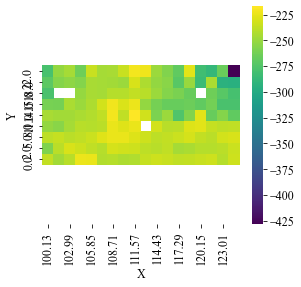

In [9]:
data_VR=(Dt1[mP1].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

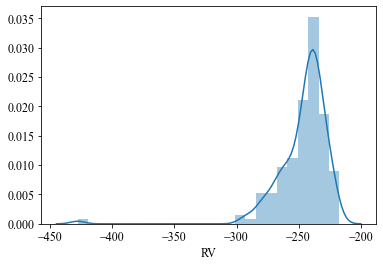

In [10]:
sns.distplot(Dt1.RV[mP1],bins=25)

In [11]:
Dt1I=Dt1[mP1]
mR1=(Dt1I.RV>-290)&(Dt1I.RV<-200)

(0.0, 18.0, 0.0, 9.0)

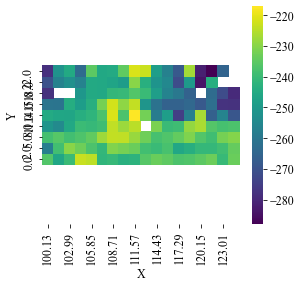

In [12]:
data_VR=(Dt1I[mR1].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

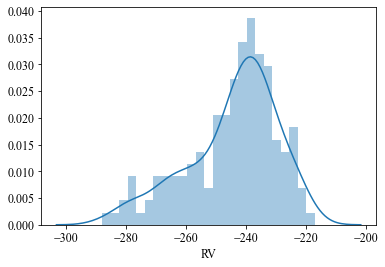

In [13]:
sns.distplot(Dt1I.RV[mR1],bins=25)

Sigma

In [14]:
T=8350#K Table 5

Xw=15.9994#
SI=19#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(Dt1I["Width.1"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

Dt1I=Dt1I.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 18.0, 0.0, 9.0)

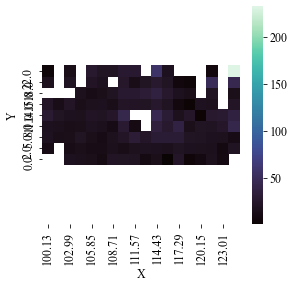

In [15]:
data_SR=(Dt1I.round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SR, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

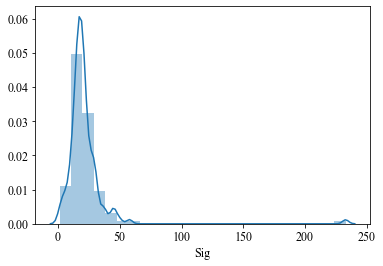

In [16]:
sns.distplot(Dt1I.Sig,bins=25)

In [17]:
Dt1II=Dt1I[mR1]
mS1=Dt1II.Sig<60

(0.0, 18.0, 0.0, 9.0)

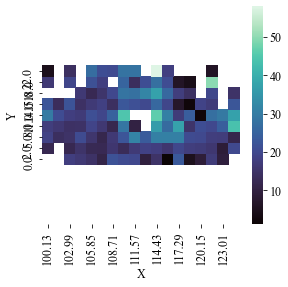

In [18]:
data_S1=(Dt1II[mS1].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_S1, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

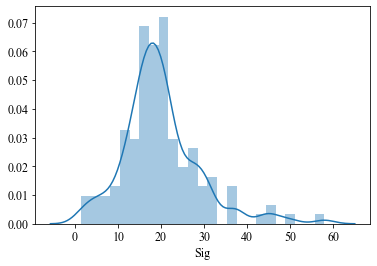

In [19]:
sns.distplot(Dt1II[mS1].Sig,bins=25)

[OIII]5007

Peak

In [20]:
#data_P2=(Dt2.round(2)).pivot(index='Y', columns='X', values='Peak.2')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#sns.heatmap(data_P2, cmap="inferno")
#plt.gca().invert_yaxis()
#plt.axis('equal')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-9.226080000000001, 225.21648, -1.1, 23.1)

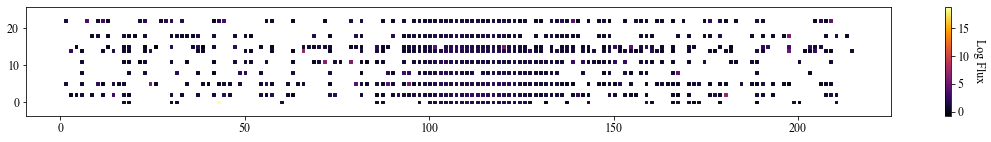

In [21]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))

plt.scatter(Dt2.X,Dt2.Y,c=np.log10(Dt2['Peak.2']), s=8,marker='s',cmap="inferno")
cbar = plt.colorbar()
cbar.set_label('Log Flux', rotation=270, labelpad=15)  
plt.axis('equal')

(0.0, 21.0, 0.0, 9.0)

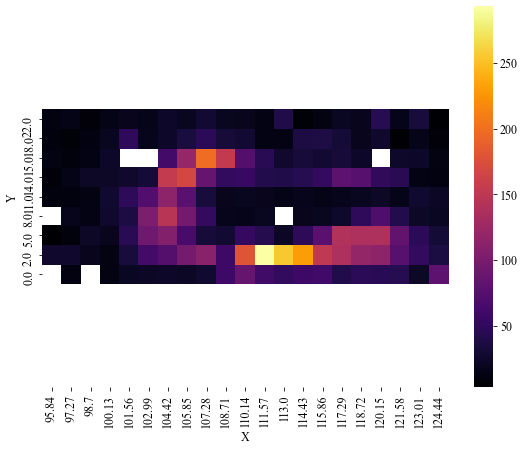

In [22]:
mP2=(Dt2.X>95)&(Dt2.X<125)&(Dt2["Peak.2"]>0)&(Dt2["Peak.2"]<10000)
data_P2=(Dt2[mP2].round(2)).pivot(index='Y', columns='X', values='Peak.2')#TableFormat

sz=7
wd=Dt2[mP2].X.max()-Dt2[mP2].X.min()
hd=Dt2[mP2].Y.max()-Dt2[mP2].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P2, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

In [23]:
l=[5006.84]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(Dt2["Center.2"]-l)/l
RV=RVo+corrhelio

Dt2=Dt2.assign(RV=RV.values)

(0.0, 21.0, 0.0, 9.0)

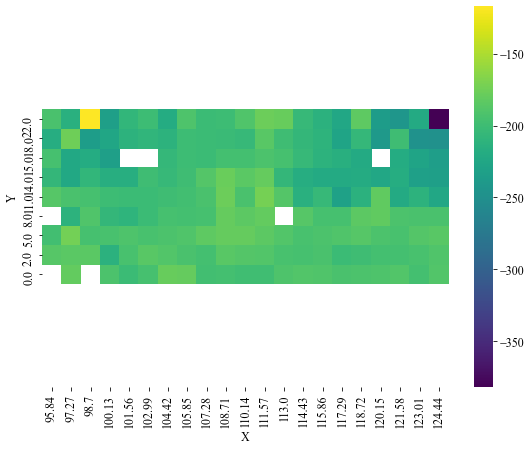

In [24]:
data_VB=(Dt2[mP2].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

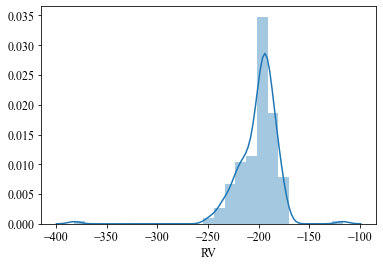

In [25]:
sns.distplot(Dt2[mP2].RV,bins=25)

In [26]:
Dt2I=Dt2[mP2]
mR2=(Dt2I.RV>-350)&(Dt2I.RV<-150)

(0.0, 21.0, 0.0, 9.0)

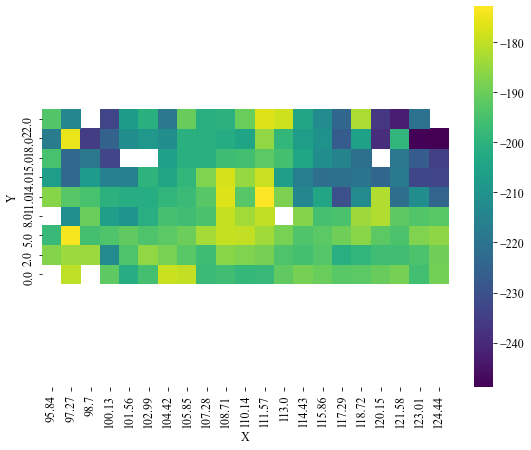

In [27]:
data_VB=(Dt2I[mR2].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

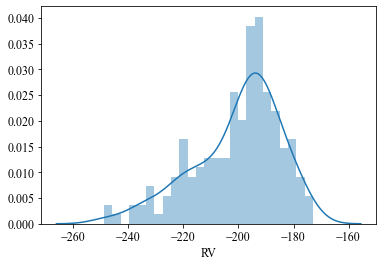

In [28]:
sns.distplot(Dt2I[mR2].RV,bins=25)

In [29]:
T=8350#K Table 5

Xw=15.9994#
SI=19#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(Dt2I["Width.2"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

Dt2I=Dt2I.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 21.0, 0.0, 9.0)

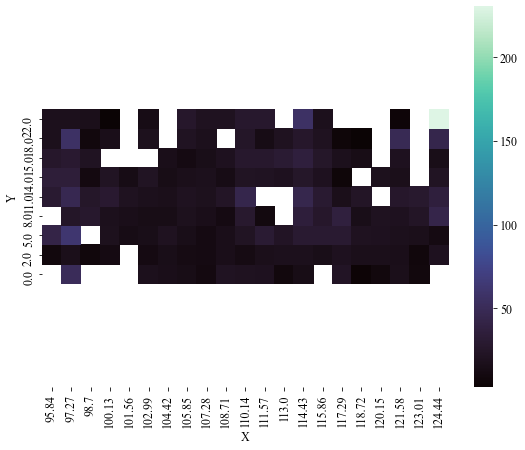

In [30]:
data_SB=(Dt2I.round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

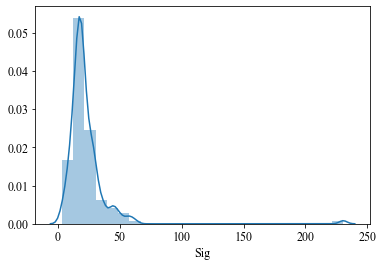

In [31]:
sns.distplot(Dt2I.Sig,bins=25)

In [32]:
Dt2II=Dt2I[mR2]
mS2=((Dt2II["Sig"]<70))

(0.0, 21.0, 0.0, 9.0)

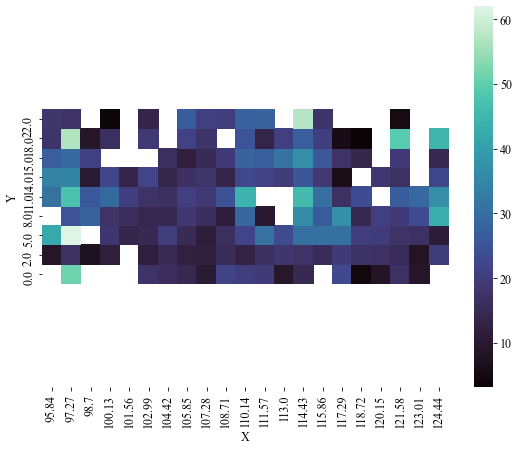

In [33]:
data_SB=(Dt2II[mS2].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

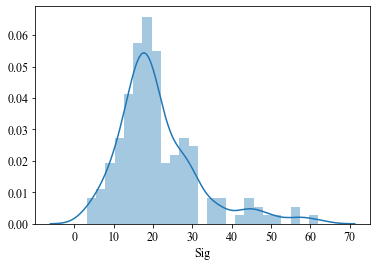

In [34]:
sns.distplot(Dt2II[mS2].Sig,bins=25)

Comparison

In [35]:
Dt1c=Dt1II[mS1]
Dt2c=Dt2II[mS2]

Peak

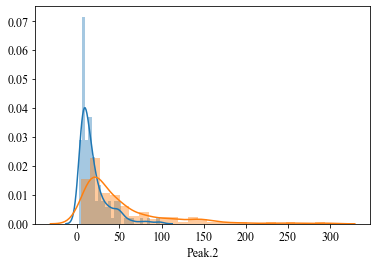

In [36]:
sns.distplot(Dt1c["Peak.1"],bins=25)
sns.distplot(Dt2c["Peak.2"],bins=25)

Normalize emission

In [37]:
PeakN=Dt1c["Peak.1"]/Dt1c["Peak.1"].max()
Dt1c=Dt1c.assign(PeakN=PeakN.values)

In [38]:
PeakN=Dt2c["Peak.2"]/Dt2c["Peak.2"].max()
Dt2c=Dt2c.assign(PeakN=PeakN.values)

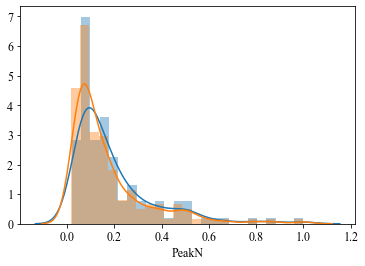

In [39]:
sns.distplot(Dt1c["PeakN"],bins=25)
sns.distplot(Dt2c["PeakN"],bins=25)

Radial Velocity

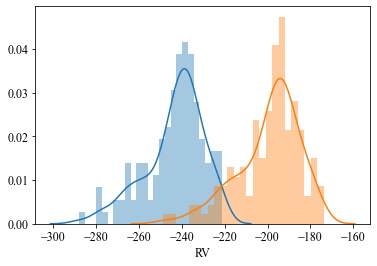

In [40]:
sns.distplot(Dt1c.RV,bins=25)
sns.distplot(Dt2c.RV,bins=25)

Sigma

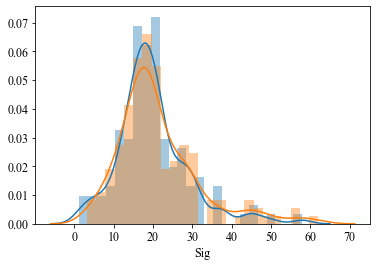

In [41]:
sns.distplot(Dt1c.Sig,bins=25)
sns.distplot(Dt2c.Sig,bins=25)

Structure Function

In [42]:
pc=4.16

1.0


[None, None]

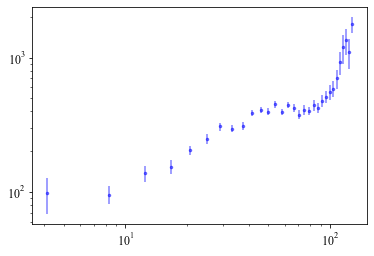

In [43]:
SF=sosf(Dt1c)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [44]:
x=SF['Lag']
y=SF['Nmqvd']-(Dt1c["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([19.45876157])

In [45]:
s=SFr[0]

In [46]:
ss=np.round((Dt1c["RV"].std())**2,2)

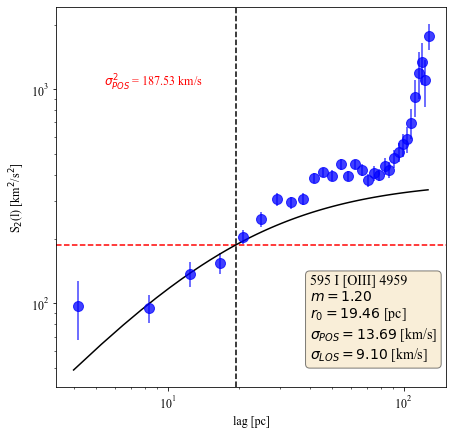

In [47]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.2

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('595 I [OIII] 4959' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (Dt1c["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(Dt1c["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [48]:
SF1=SF

1.0


[None, None]

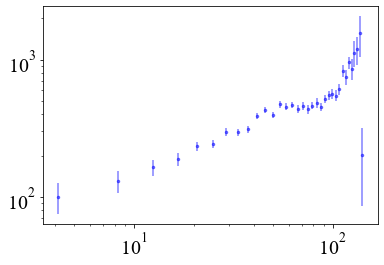

In [49]:
SF=sosf(Dt2c)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [50]:
x=SF['Lag']
y=SF['Nmqvd']-(Dt2c["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 18.47392589, 140.87002948])

In [51]:
s=SFr[0]

In [52]:
ss=np.round((Dt2c["RV"].std())**2,2)

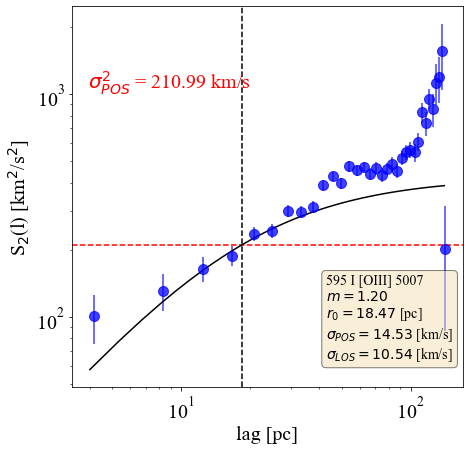

In [53]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.2

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('595 I [OIII] 5007' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (Dt2c["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(Dt2c["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [54]:
SF2=SF

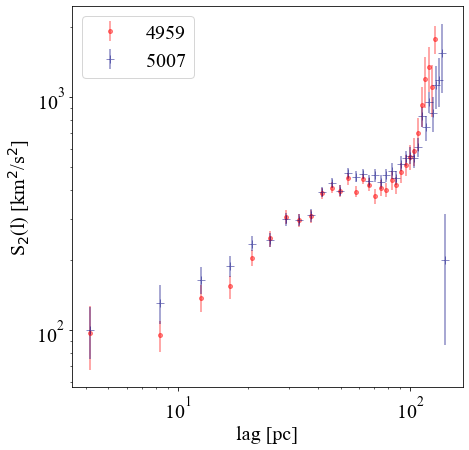

In [55]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF1.Lag,SF1.Nmqvd, yerr=SF1.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.45, markersize=8,label='4959')

ax.errorbar(SF2.Lag,SF2.Nmqvd, yerr=SF2.ErrY, marker='+', fmt=' ',color="navy", ecolor="navy",
                     alpha=0.45, markersize=8,label='5007')

plt.yscale('log')
plt.xscale('log')
ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
plt.legend()

[Text(0, 0.5, '$σ$ [km/s]'), Text(0.5, 0, 'I')]

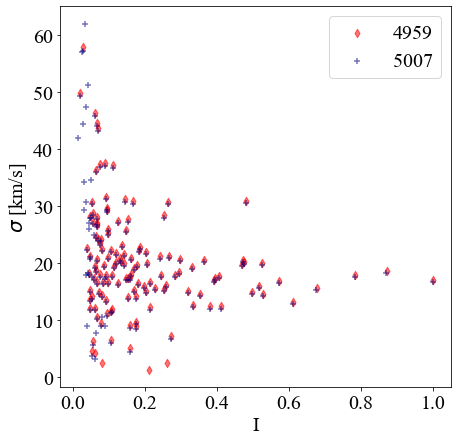

In [56]:
fig,ax=plt.subplots(figsize=(7,7))
plt.scatter(Dt1c["Peak.1"]/Dt1c["Peak.1"].max(),Dt1c["Sig"],alpha=0.55,marker='d',color="red",label='4959')
plt.scatter(Dt2c["Peak.2"]/Dt2c["Peak.2"].max(),Dt2c["Sig"],alpha=0.55,marker='+',color="navy",label='5007')
plt.legend()
plt.legend()
ax.set(xlabel='I', ylabel='$σ$ [km/s]')

In [57]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 16.134790182113647 seconds ---
